In [1]:
%matplotlib inline
import pandas
import seaborn
import google_survey

responses = pandas.read_csv('responses.csv')
responses.head()

,person,question,response_str,response_n,response
0,p45,q9,"Libraries, Offices",0,Libraries
1,p45,q9,"Libraries, Offices",1,Offices
2,p77,q9,Libraries,0,Libraries
3,p78,q9,"Libraries, Bars, Restaurants, Offices",0,Libraries
4,p78,q9,"Libraries, Bars, Restaurants, Offices",1,Bars


In [2]:
import json
questions = pandas.read_csv('questions.csv')
questions['choices'] = questions.choices_json.apply(json.loads)
questions.head()

,id,title,choices_json,choices
0,q0,Email address *,[],[]
1,q1,How are you using Python?,"[""Software (engineering/developing)"", ""Science...","[Software (engineering/developing), Science (s..."
2,q2,What kind(s) of events would you like to see a...,"[""Software (engineering/developing)"", ""Science...","[Software (engineering/developing), Science (s..."
3,q3,What format(s) of events would you like to see...,"[""Presentations"", ""Hack Nights"", ""Python Schoo...","[Presentations, Hack Nights, Python Schooling,..."
4,q4,At what skill level would you like to see even...,"[""Introductory"", ""Intermediate"", ""Expert""]","[Introductory, Intermediate, Expert]"


In [14]:
def label_response_type(question_responses):
    assert len(question_responses.question.unique()) == 1
    question_id = question_responses.question.iloc[0]
    choices = questions.ix[questions.id == question_id, 'choices'].tolist()[0]
    response_types = []
    for response in question_responses.response:
        if response not in choices:
            response = 'Other'
        response_types.append(response)
    question_responses['response_type'] = response_types
    return question_responses

responses = pandas.read_csv('responses.csv')
responses = responses.groupby('question').apply(label_response_type)
responses.set_index('question', inplace=True)

In [22]:
questions

,id,title,choices_json,choices
0,q0,Email address *,[],[]
1,q1,How are you using Python?,"[""Software (engineering/developing)"", ""Science...","[Software (engineering/developing), Science (s..."
2,q2,What kind(s) of events would you like to see a...,"[""Software (engineering/developing)"", ""Science...","[Software (engineering/developing), Science (s..."
3,q3,What format(s) of events would you like to see...,"[""Presentations"", ""Hack Nights"", ""Python Schoo...","[Presentations, Hack Nights, Python Schooling,..."
4,q4,At what skill level would you like to see even...,"[""Introductory"", ""Intermediate"", ""Expert""]","[Introductory, Intermediate, Expert]"
5,q5,What day(s) of the week work best for you?,"[""Monday"", ""Tuesday"", ""Wednesday"", ""Thursday"",...","[Monday, Tuesday, Wednesday, Thursday, Friday,..."
6,q6,What time(s) of day work best for you?,"[""Work hours (8am - 6pm)"", ""After work hours (...","[Work hours (8am - 6pm), After work hours (6pm..."
7,q7,How frequently would you be interested in atte...,"[""Never"", ""A few times a year"", ""Monthly"", ""We...","[Never, A few times a year, Monthly, Weekly]"
8,q8,Where in town works best for you to attend the...,"[""Far West"", ""Near West"", ""Downtown"", ""East""]","[Far West, Near West, Downtown, East]"
9,q9,At what kind of facilities would you like to s...,"[""Libraries"", ""Bars"", ""Restaurants"", ""Offices""...","[Libraries, Bars, Restaurants, Offices, Other:]"


In [26]:
def countplot(question_id):
    seaborn.countplot(responses.ix[question_id, 'response_type'])

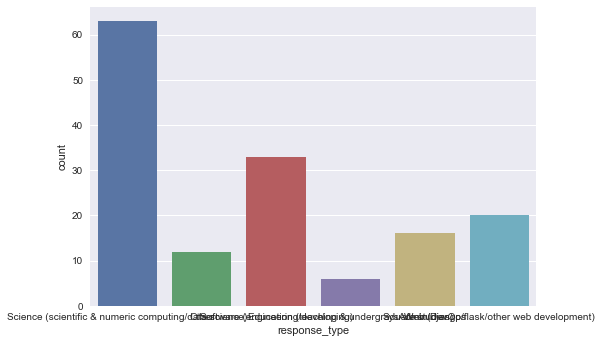

In [27]:
countplot('q1')

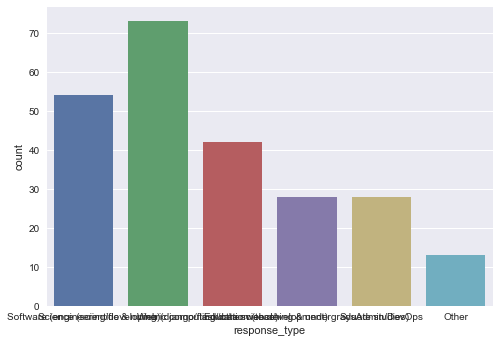

In [28]:
countplot('q2')

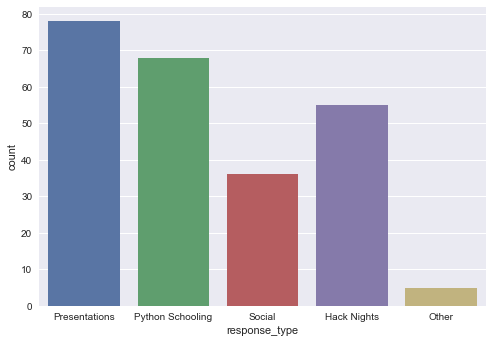

In [29]:
countplot('q3')

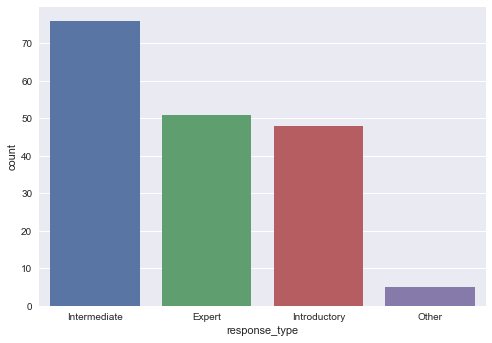

In [30]:
countplot('q4')

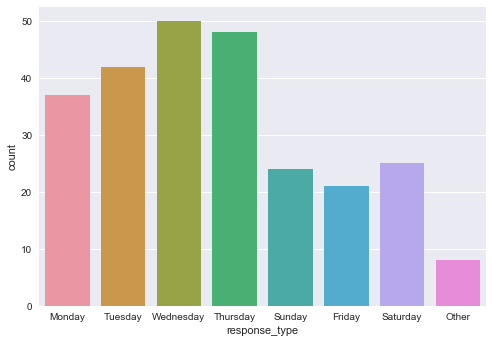

In [31]:
countplot('q5')

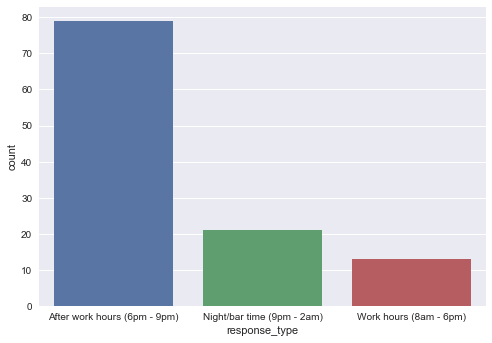

In [32]:
countplot('q6')

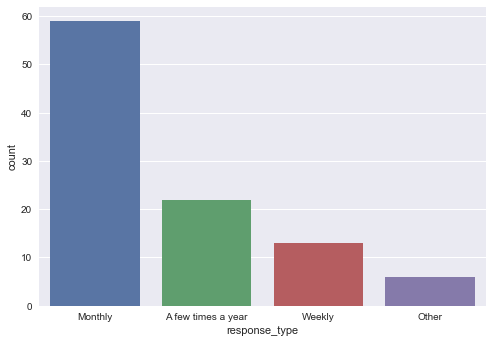

In [33]:
countplot('q7')

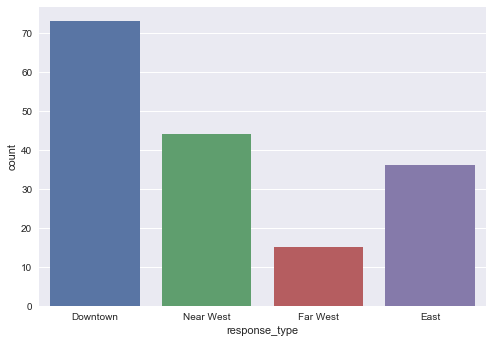

In [34]:
countplot('q8')

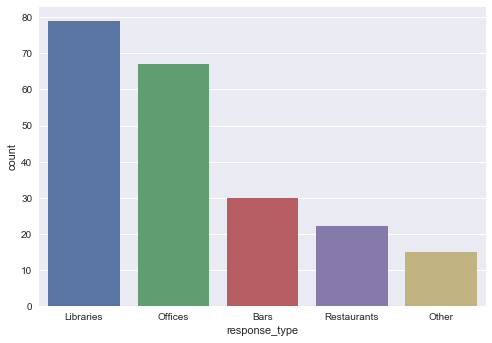

In [35]:
countplot('q9')

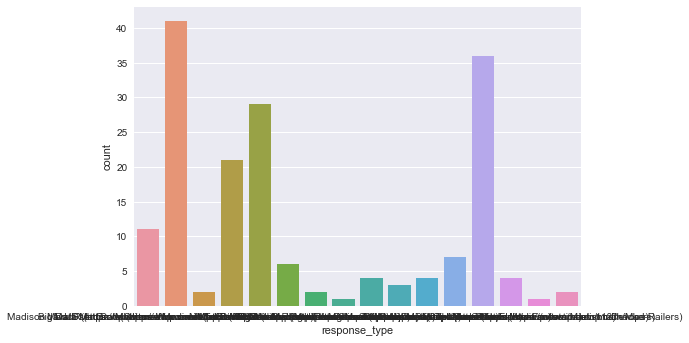

In [36]:
countplot('q10')

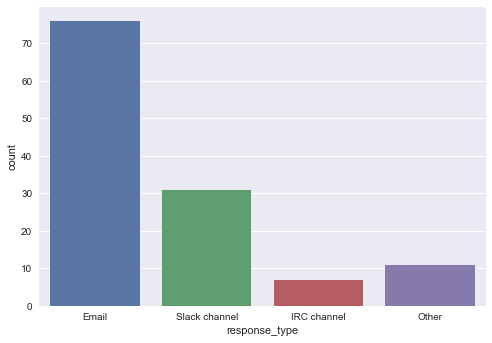

In [37]:
countplot('q11')

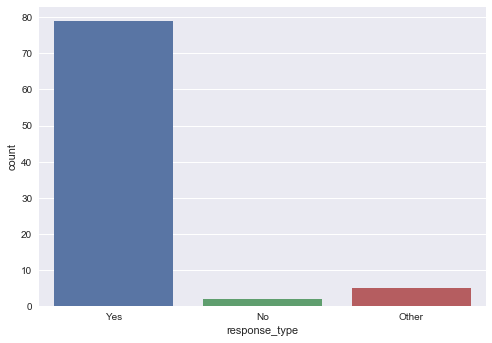

In [38]:
countplot('q12')

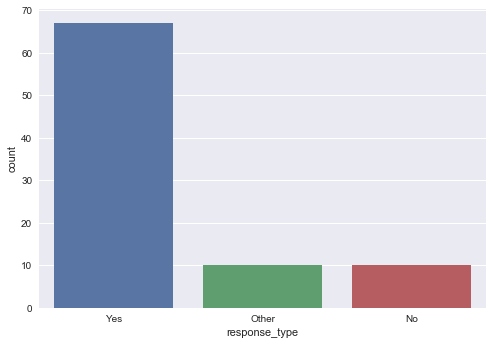

In [39]:
countplot('q13')